# **GRIP: The Sparks Foundation**

# **By : HarshaVardhan Reddy**

## **Task 1: Prediction using Supervised ML**


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
#Reading data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

In [ ]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
data.shape

(25, 2)

In [ ]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
print(len(data))

25


In [ ]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## EDA

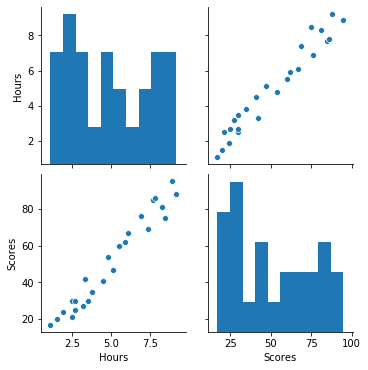

In [ ]:
sns.pairplot(data)

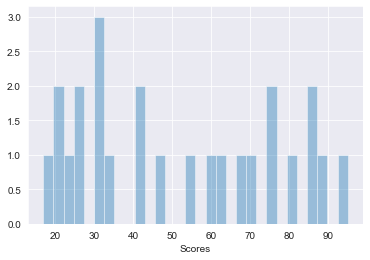

In [ ]:
sns.set_style('darkgrid')
sns.distplot(data['Scores'],kde=False,bins=30)

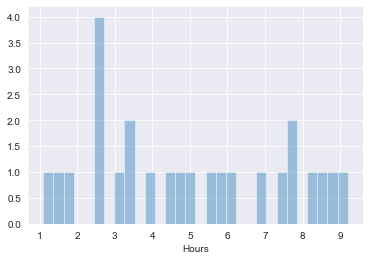

In [ ]:
sns.set_style('darkgrid')
sns.distplot(data['Hours'],kde=False,bins=30)

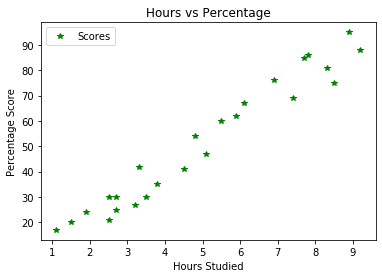

In [ ]:
data.plot(x='Hours', y='Scores', style='*',color='green')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
#Dividing train and test values in 70:30 size respectively
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=101) 

In [ ]:
X_train

array([[5.1],
       [1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [ ]:
X_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5],
       [4.8],
       [3.2],
       [8.5]])

In [ ]:
y_train

array([47, 17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86, 88, 24, 62],
      dtype=int64)

In [ ]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75], dtype=int64)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
#Creating and training model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training finished.")

Training finished.


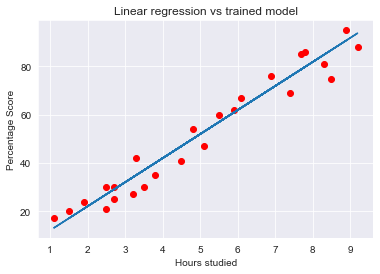

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.title("Linear regression vs trained model")
plt.scatter(X, y,color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print(X_test)
y_pred = regressor.predict(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


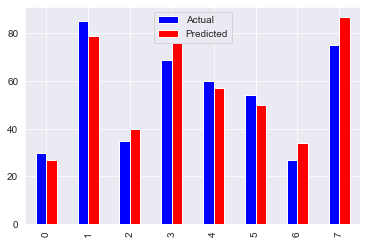

In [ ]:
df.plot(kind='bar',color=['blue','red'])
plt.show()

In [ ]:
hours = [[9.25]]
pred = regressor.predict(hours)
print("Predicted Score = {}".format(pred[0]))

Predicted Score = 94.29276125536512


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.864954643694258
Mean Squared Error: 41.63486564552886
Mean Squared Error: 6.452508476982333
